## Checking response directed to opponent
Load data

In [1]:
import re
# load the abcnews_transcript file from the data folder
with open('../data/abcnews_transcript.txt', 'r') as file:
    data = file.read()


trumps_responses = []
kamalas_responses = []

trump_identifier = "FORMER PRESIDENT DONALD TRUMP: "
kamala_identifier = "VICE PRESIDENT KAMALA HARRIS: "

for line in data.split('\n'):
    if line.startswith(trump_identifier):
        trumps_responses.append(line[len(trump_identifier):])
    elif line.startswith(kamala_identifier):
        kamalas_responses.append(line[len(kamala_identifier):])


### Trump towards direct Harris

In [6]:
# Turn the list of sentences in rtumps_responses into a dictionary 
# where the key is the number of the response and the value is the
# sentences in the response. Sentences are identified by ending with
# a . or a ? or a !.

trumps_responses_dict = {}
for i, response in enumerate(trumps_responses):
    trumps_responses_dict[i] = re.split(r'(?<=[.!?])\s', response)

harris_responses_dict = {}
for i, response in enumerate(kamalas_responses):
    harris_responses_dict[i] = re.split(r'(?<=[.!?])\s', response)

all_trumps_sentences = [ sentence for response in trumps_responses_dict.values() for sentence in response ]
all_harris_sentences = [ sentence for response in harris_responses_dict.values() for sentence in response ]

In [12]:

def count_sentences_with_words_per_response(response_dict, words):
    count_dict = {}
    for i, response in response_dict.items():
        count = 0
        for sentence in response:
            for word in words:
                if word in sentence:
                    count += 1
        count_dict[i] = count
    return count_dict


In [53]:
# Use the function to count the number of sentences in Trump's responses that contain the words "Kamala" or "Harris"
# and the number of sentences in Harris's responses that contain the words "Trump" or "Donald".

trump_reference_kamala = count_sentences_with_words_per_response(trumps_responses_dict, ["Kamala", "Harris"])
harris_reference_trump = count_sentences_with_words_per_response(harris_responses_dict, ["Trump", "Donald"])
trump_reference_biden = count_sentences_with_words_per_response(trumps_responses_dict, ["Biden", "Joe"])

# Sum up all the counts for Trump and Harris
total_trump_references = sum(trump_reference_kamala.values())
total_harris_references = sum(harris_reference_trump.values())

# Print the results
print(f"Trump referred to Kamala or Harris {total_trump_references} times.")
print(f"Harris referred to Trump or Donald {total_harris_references} times.")
print(f"Trump referred to Biden or Joe {sum(trump_reference_biden.values())} times.")

Trump referred to Kamala or Harris 0 times.
Harris referred to Trump or Donald 70 times.
Trump referred to Biden or Joe 15 times.


In [17]:
# Print all sentences where Trump referred to Kamala or Harris using the dictionary

for response, count in trump_reference_kamala.items():
    if count > 0:
        print(f"Response {response}:")
        for sentence in trumps_responses_dict[response]:
            if "Kamala" in sentence or "Harris" in sentence:
                print(f"  {sentence}")

# Print all sentences where Harris referred to Trump or Donald using the dictionary
for response, count in harris_reference_trump.items():
    if count > 0:
        print(f"Response {response}:")
        for sentence in harris_responses_dict[response]:
            if "Trump" in sentence or "Donald" in sentence:
                print(f"  {sentence}")

Response 2:
  My opponent has a plan that I call the Trump sales tax, which would be a 20% tax on everyday goods that you rely on to get through the month.
  Economists have said that Trump's sales tax would actually result for middle-class families in about $4,000 more a year because of his policies and his ideas about what should be the backs of middle-class people paying for tax cuts for billionaires.
Response 3:
  Let's talk about what Donald Trump left us.
  Donald Trump left us the worst unemployment since the Great Depression.
  Donald Trump left us the worst public health epidemic in a century.
  Donald Trump left us the worst attack on our democracy since the Civil War.
  And what we have done is clean up Donald Trump's mess.
Response 4:
  So, Donald Trump has no plan for you.
  What Goldman Sachs has said is that Donald Trump's plan would make the economy worse.
  What the Wharton School has said is Donald Trump's plan would actually explode the deficit.
  And I'd invite you 

In [21]:
# Print the number of responses where Trump referred to Kamala or Harris and the percentage of that
# out of all of his responses
# First count the number of responses where Trump referred to Kamala or Harris
responses_with_references = len([ count for count in trump_reference_kamala.values() if count > 0 ])
percentage = responses_with_references / len(trumps_responses_dict) * 100
print(f"Trump referred to Kamala or Harris in {responses_with_references} responses, which is {percentage:.2f}% of his responses.")

# for harris
responses_with_references = len([ count for count in harris_reference_trump.values() if count > 0 ])
percentage = responses_with_references / len(harris_responses_dict) * 100
print(f"Harris referred to Trump or Donald in {responses_with_references} responses, which is {percentage:.2f}% of her responses.")


Trump referred to Kamala or Harris in 0 responses, which is 0.00% of his responses.
Harris referred to Trump or Donald in 19 responses, which is 55.88% of her responses.


In [56]:
print(len(harris_responses_dict))
print(len(trumps_responses_dict))

34
74


In [45]:
trump_reference_indirect_kamala = count_sentences_with_words_per_response(trumps_responses_dict, [" she", " her ", "her's"])
harris_reference_indirect_trump = count_sentences_with_words_per_response(harris_responses_dict, [" he's", " he ", " his ", " him ", " his's"])

In [40]:
# Print all sentences where Trump referred to Kamala or Harris using the dictionary

for response, count in trump_reference_indirect_kamala.items():
    if count > 0:
        print(f"({count}) - Response {response}:")
        for sentence in trumps_responses_dict[response]:
            if " she" in sentence or " her " in sentence or "her's" in sentence:
                print(f"  {sentence}")


(1) - Response 2:
  These are the people that she and Biden let into our country.
(1) - Response 3:
  Number one, I have nothing to do, as you know and as she knows better than anyone, I have nothing to do with Project 2025.
(3) - Response 4:
  They gave her that to say.
  And just to finish off, she doesn't have a plan.
  Take a look at her plan.
(1) - Response 5:
  I charge, I was the only president ever China was paying us hundreds of billions of dollars and so were other countries and you know if she doesn't like 'em they should have gone out and they should have immediately cut the tariffs but those tariffs are there three and a half years now under their administration.
(10) - Response 6:
  I don't say her because she has no policy.
  Everything that she believed three years ago and four years ago is out the window.
  In fact, I was going to send her a MAGA hat.
  But if she ever got elected, she'd change it.
  Everybody knows she's a Marxist.
  Her father's a Marxist professor i

In [41]:
# Print the number of responses where Trump referred to Kamala or Harris indirectly and the percentage of that
# out of all of his responses
# First count the number of responses where Trump referred to Kamala or Harris

responses_with_references = len([ count for count in trump_reference_indirect_kamala.values() if count > 0 ])
percentage = responses_with_references / len(trumps_responses_dict) * 100
print(f"Trump referred to Kamala or Harris indirectly in {responses_with_references} responses, which is {percentage:.2f}% of his responses.")



Trump referred to Kamala or Harris indirectly in 34 responses, which is 45.95% of his responses.


In [46]:
# Print all sentences where Kamala referred indirectly to Trump with he, his
for response, count in harris_reference_indirect_trump.items():
    if count > 0:
        print(f"({count}) - Response {response}:")
        for sentence in harris_responses_dict[response]:
            # " he ", " his ", " him ", " his's"
            if " he's" in sentence or " he " in sentence or " his " in sentence or " him " in sentence or " his's" in sentence:
                print(f"  {sentence}")

(3) - Response 2:
  My opponent, on the other hand, his plan is to do what he has done before, which is to provide a tax cut for billionaires and big corporations, which will result in $5 trillion to America's deficit.
  Economists have said that Trump's sales tax would actually result for middle-class families in about $4,000 more a year because of his policies and his ideas about what should be the backs of middle-class people paying for tax cuts for billionaires.
(1) - Response 3:
  What you're going to hear tonight is a detailed and dangerous plan called Project 2025 that the former president intends on implementing if he were elected again.
(3) - Response 4:
  And when you look at his economic plan, it's all about tax breaks for the richest people.
  Sixteen Nobel laureates have described his economic plan as something that would increase inflation and by the middle of next year would invite a recession.
  And I'd invite you to know that Donald Trump actually has no plan for you, 

  Reference to Zelenskyy or Putin


  ```I shared with him American intelligence about how he could defend himself.```

  
  ```Otherwise, Putin would be sitting in Kyiv with his eyes on the rest of Europe.```

  *Response 26:* ```When I went to meet with President Zelenskyy, I've now met with him over five times.``` 

In [50]:
# Print out the number of responses where Kamala referred to Trump indirectly and the percentage of that
# out of all of her responses
# Subtract 3 from the total number of responses because 3 reference someone else
responses_with_references = len([ count for count in harris_reference_indirect_trump.values() if count > 0 ]) - 1 # Response 26 is invalid
percentage = responses_with_references / len(harris_responses_dict) * 100
print(f"Harris referred to Trump indirectly in {responses_with_references} responses, which is {percentage:.2f}% of her responses.")


Harris referred to Trump indirectly in 19 responses, which is 55.88% of her responses.


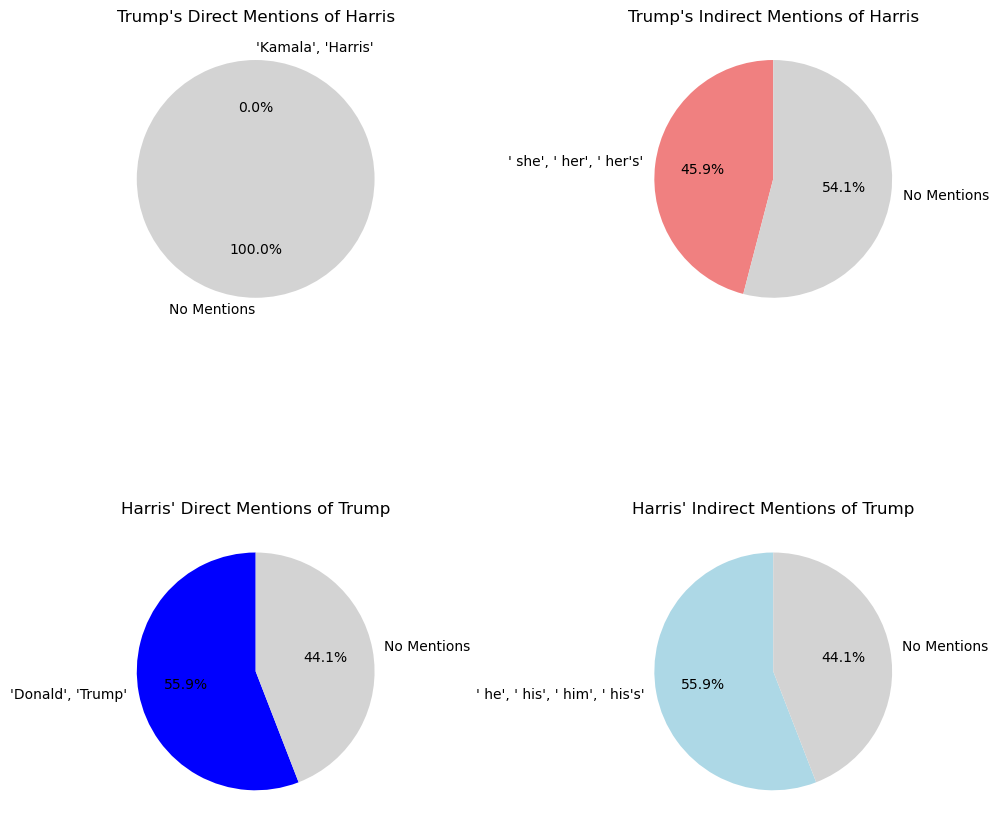

In [67]:
import matplotlib.pyplot as plt

# Data
# Corrected Data with Normalization
trump_direct_harris = [0, 74]  # 0 direct mentions, 74 total
trump_indirect_harris = [34, 40]  # 34 indirect mentions, 40 remaining from total 74

harris_direct_trump = [19, 15]  # 19 direct mentions, remaining from total 34
harris_indirect_trump = [19, 15]  # 19 indirect mentions, remaining from total 34

# Labels and colors
trump_direct_labels = ['\'Kamala\', \'Harris\'', 'No Mentions']
trump_indirect_labels = ['\' she\', \' her\', \' her\'s\'', 'No Mentions']
harris_indirect_labels = ['\' he\', \' his\', \' him\', \' his\'s\'', 'No Mentions']
harris_direct_labels = ['\'Donald\', \'Trump\'', 'No Mentions']
colors_trump_direct = ['red', 'lightgray']
colors_trump_indirect = ['lightcoral', 'lightgray']
colors_harris_direct = ['blue', 'lightgray']
colors_harris_indirect = ['lightblue', 'lightgray']

# Create the subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Trump Direct mentions (Top Left)
axs[0, 0].pie(trump_direct_harris, labels=trump_direct_labels, colors=colors_trump_direct, autopct='%1.1f%%', startangle=90)
axs[0, 0].set_title("Trump's Direct Mentions of Harris")

# Trump Indirect mentions (Top Right)
axs[0, 1].pie(trump_indirect_harris, labels=trump_indirect_labels, colors=colors_trump_indirect, autopct='%1.1f%%', startangle=90)
axs[0, 1].set_title("Trump's Indirect Mentions of Harris")

# Harris Direct mentions (Bottom Left)
axs[1, 0].pie(harris_direct_trump, labels=harris_direct_labels, colors=colors_harris_direct, autopct='%1.1f%%', startangle=90)
axs[1, 0].set_title("Harris' Direct Mentions of Trump")

# Harris Indirect mentions (Bottom Right)
axs[1, 1].pie(harris_indirect_trump, labels=harris_indirect_labels, colors=colors_harris_indirect, autopct='%1.1f%%', startangle=90)
axs[1, 1].set_title("Harris' Indirect Mentions of Trump")

# Adjust layout
# Store the plot with 300 dpi resolution   
plt.savefig('mentions.png', dpi=300)
plt.tight_layout()
plt.show()


In [68]:
# Call the function but with both sets for direct and indirect mentions of Harris by Trump
trump_ref_all_harris = count_sentences_with_words_per_response(trumps_responses_dict, ["Kamala", "Harris", " she", " her ", "her's"])
harris_ref_all_trump = count_sentences_with_words_per_response(harris_responses_dict, ["Trump", "Donald", " he's", " he ", " his ", " him ", " his's"])

# Print the percentage of responses where Trump referred to Kamala or Harris directly or indirectly
responses_with_references = len([ count for count in trump_ref_all_harris.values() if count > 0 ])
percentage = responses_with_references / len(trumps_responses_dict) * 100
print(f"Trump referred to Kamala or Harris in {responses_with_references} responses, which is {percentage:.2f}% of his responses.")

# Print the percentage of responses where Harris referred to Trump directly or indirectly
responses_with_references = len([ count for count in harris_ref_all_trump.values() if count > 0 ])
percentage = responses_with_references / len(harris_responses_dict) * 100
print(f"Harris referred to Trump in {responses_with_references} responses, which is {percentage:.2f}% of her responses.")



Trump referred to Kamala or Harris in 34 responses, which is 45.95% of his responses.
Harris referred to Trump in 22 responses, which is 64.71% of her responses.
